<a href="https://colab.research.google.com/github/amanjaiswal73892/changemypet/blob/master/Ensemble_tests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch

In [2]:
model = torch.hub.load('pytorch/vision:v0.6.0', 'deeplabv3_resnet101', pretrained=True).eval()

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.6.0


In [3]:
model2 = torch.hub.load('pytorch/vision:v0.6.0', 'fcn_resnet101', pretrained=True).eval()


Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.6.0


In [16]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [17]:
!git clone "https://github.com/amanjaiswal73892/changemypet.git"

Cloning into 'changemypet'...
remote: Enumerating objects: 35, done.
remote: Counting objects: 100% (35/35), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 35 (delta 4), reused 27 (delta 1), pack-reused 0
Unpacking objects: 100% (35/35), done.


In [39]:
# sample execution (requires torchvision)
from PIL import Image, ImageOps
from torchvision import transforms

input_image = Image.open('/content/dog_translate.png')
preprocess = transforms.Compose([
    transforms.Resize(512),
    transforms.CenterCrop(512),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

input_tensor = preprocess(input_image)

input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model
# move the input and model to GPU for speed if available
if torch.cuda.is_available():
    input_batch = input_batch.to('cuda')
    model.to('cuda')
    model2.to('cuda')
# ouput_original_image = output.argmax(0).float()

In [ ]:
# # create a color pallette, selecting a color for each class
# palette = torch.tensor([2 ** 25 - 1, 2 ** 15 - 1, 2 ** 21 - 1])
# colors = torch.as_tensor([i for i in range(21)])[:, None] * palette
# colors = (colors % 255).numpy().astype("uint8")

# # plot the semantic segmentation predictions of 21 classes in each color
# r = Image.fromarray(ouput_original_image.byte().cpu().numpy()).resize(input_image.size)
# r.putpalette(colors)

# import matplotlib.pyplot as plt
# plt.imshow(r)
# # plt.show()

In [5]:
from changemypet.src.biggan import BigGAN512
import torch 
import torchvision
from scipy.stats import truncnorm
from torch.autograd import Variable
import matplotlib.pyplot as plt

In [47]:
truncation = torch.clamp(torch.tensor(0.4), min=0.02+1e-4, max=1.0-1e-4).float()  # truncation is 0.4
c = torch.tensor((210,)).long()  # class_label is 260
z = truncation * torch.as_tensor(truncnorm.rvs(-2.0, 2.0, size=(1, 128),random_state=16)).float()

z.requires_grad = True

biggan = BigGAN512()

biggan.load_state_dict(torch.load("/content/drive/My Drive/biggan/biggan512-release.pt"))

<All keys matched successfully>

In [48]:

with torch.no_grad():
    output_predictions_2 = model2(input_batch)['out'][0]
    output_predictions_1 = model(input_batch)['out'][0]


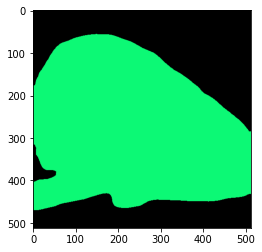

In [50]:
palette = torch.tensor([2 ** 25 - 1, 2 ** 15 - 1, 2 ** 21 - 1])
colors = torch.as_tensor([i for i in range(21)])[:, None] * palette
colors = (colors % 255).numpy().astype("uint8")

# plot the semantic segmentation predictions of 21 classes in each color
r1 = Image.fromarray(output_predictions_1.argmax(0).byte().cpu().numpy()).resize(input_image.size)
r2 = Image.fromarray(output_predictions_2.argmax(0).byte().cpu().numpy()).resize(input_image.size)
r1.putpalette(colors)
r2.putpalette(colors)

import matplotlib.pyplot as plt
plt.imshow(r1)

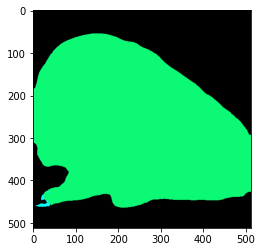

In [51]:
plt.imshow(r2)

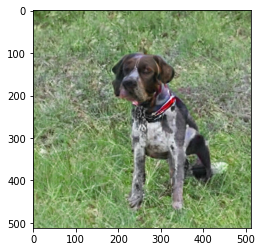

In [48]:
biggan.eval()
img = biggan(z, c, truncation.item())
pil = torchvision.transforms.ToPILImage()((0.5 * (img.data + 1)).squeeze())
import PIL
# pil=ImageOps.mirror(pil)
# pil=pil.transpose(PIL.Image.ROTATE_90)
plt.imshow(pil)
# pil.save("dog_translate.png")

In [31]:
(torch.ones(5,4) + torch.ones(5,4))/2

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

In [11]:
torch.stack((a,b)).float().mean()

tensor(3.5000)

Epoch :  1
BCELoss  :  2.0094380378723145
Loss_21_classes  :  2.0149407386779785


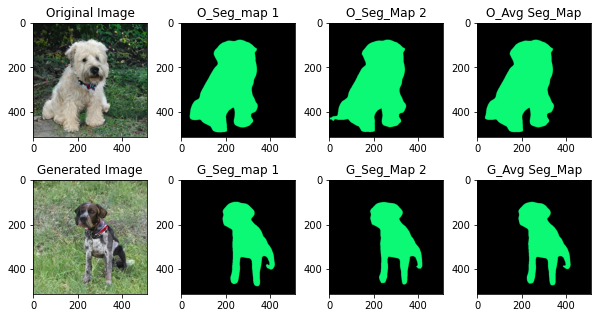

----------------------------------------------------------------------------------------------------
Epoch :  2
BCELoss  :  1.6458855867385864
Loss_21_classes  :  1.6592382192611694


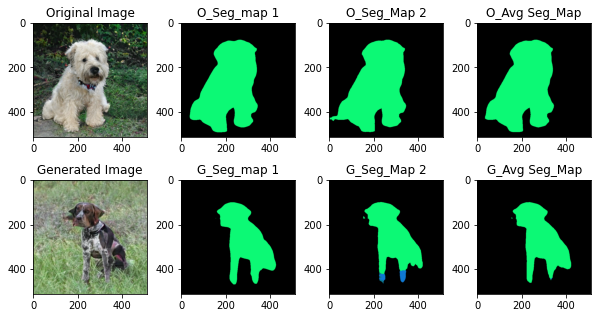

----------------------------------------------------------------------------------------------------
Epoch :  3
BCELoss  :  1.5325274467468262
Loss_21_classes  :  1.5387043952941895


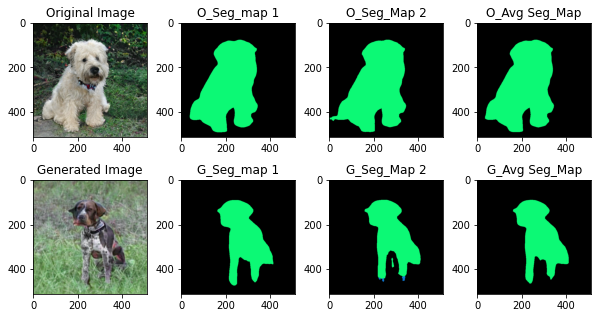

----------------------------------------------------------------------------------------------------
Epoch :  4
BCELoss  :  1.191186785697937
Loss_21_classes  :  1.2191952466964722


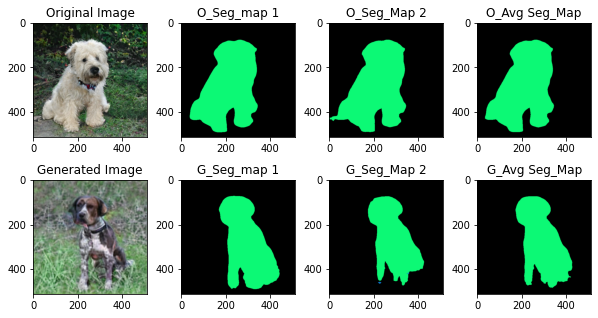

----------------------------------------------------------------------------------------------------
Epoch :  5
BCELoss  :  0.8634399771690369
Loss_21_classes  :  0.8857689499855042


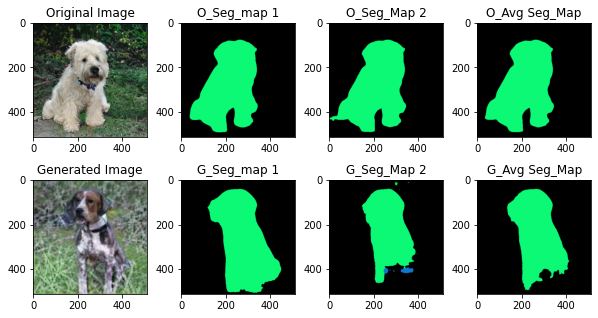

----------------------------------------------------------------------------------------------------
Epoch :  6
BCELoss  :  0.9362581968307495
Loss_21_classes  :  0.8920198678970337


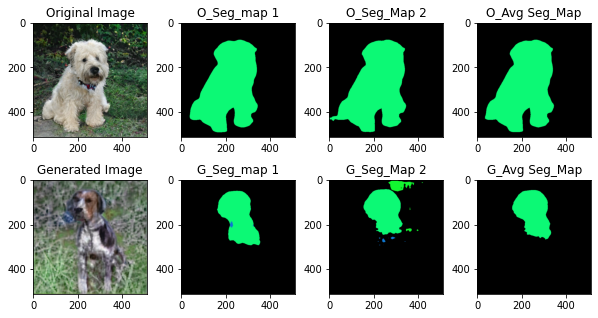

----------------------------------------------------------------------------------------------------
Epoch :  7
BCELoss  :  0.6454282999038696
Loss_21_classes  :  0.6073619723320007


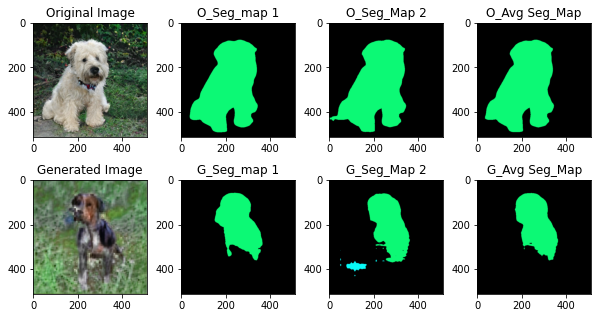

----------------------------------------------------------------------------------------------------
Epoch :  8
BCELoss  :  0.5424138903617859
Loss_21_classes  :  0.5498955249786377


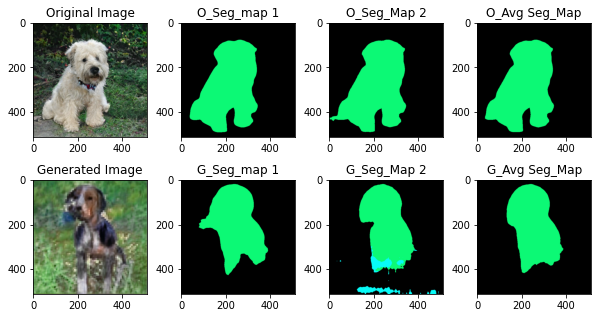

----------------------------------------------------------------------------------------------------
Epoch :  9
BCELoss  :  0.83377605676651
Loss_21_classes  :  0.8439788222312927


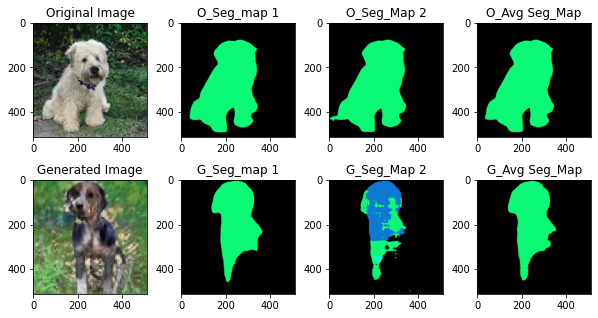

----------------------------------------------------------------------------------------------------
Epoch :  10
BCELoss  :  1.25203537940979
Loss_21_classes  :  1.1898853778839111


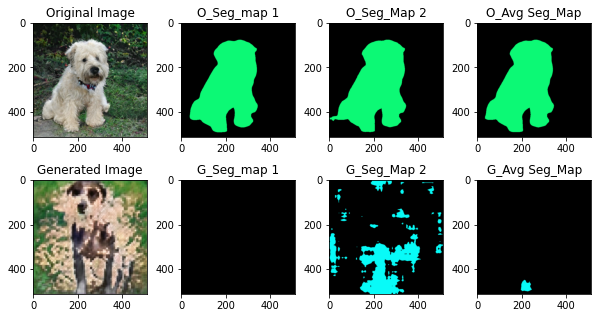

----------------------------------------------------------------------------------------------------
Epoch :  11
BCELoss  :  0.9044381380081177
Loss_21_classes  :  0.8191274404525757


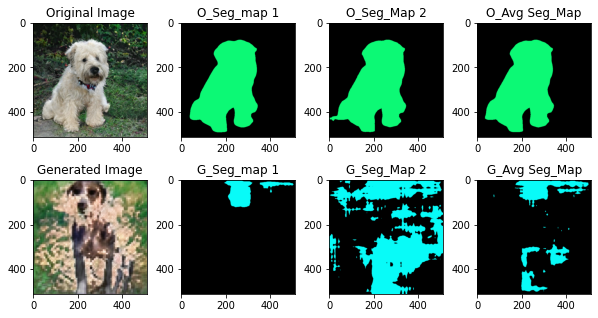

----------------------------------------------------------------------------------------------------
Epoch :  12
BCELoss  :  0.648166298866272
Loss_21_classes  :  0.6536613702774048


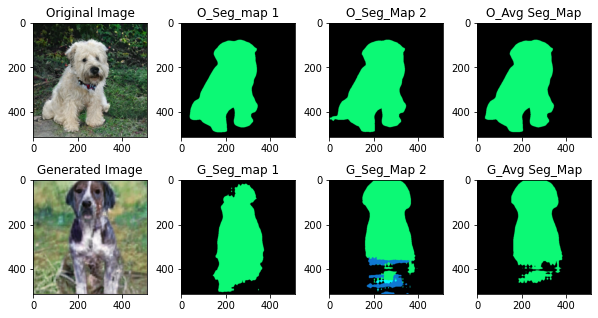

----------------------------------------------------------------------------------------------------
Epoch :  13
BCELoss  :  0.5339369773864746
Loss_21_classes  :  0.6184824705123901


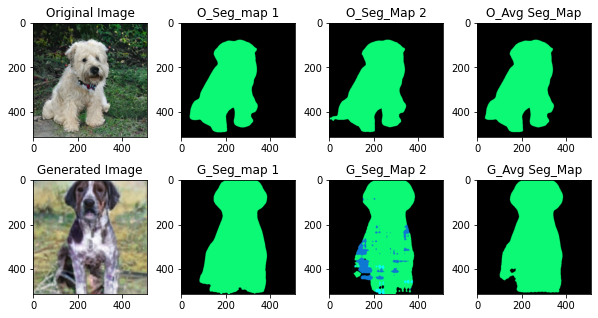

----------------------------------------------------------------------------------------------------
Epoch :  14
BCELoss  :  0.6838284134864807
Loss_21_classes  :  0.7589523196220398


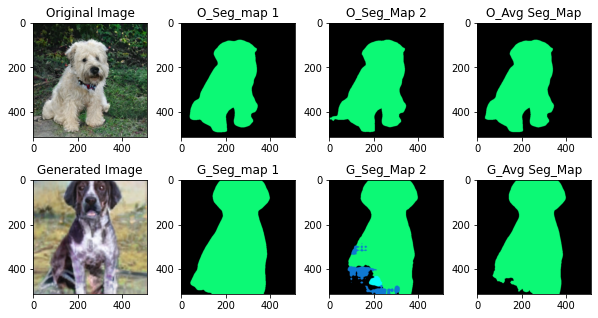

----------------------------------------------------------------------------------------------------
Epoch :  15
BCELoss  :  0.48425179719924927
Loss_21_classes  :  0.5316253304481506


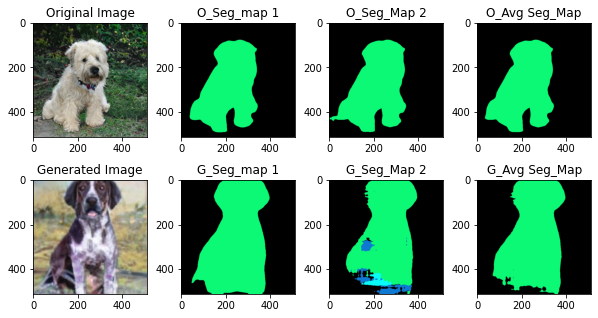

----------------------------------------------------------------------------------------------------
Epoch :  16
BCELoss  :  0.42119765281677246
Loss_21_classes  :  0.42849671840667725


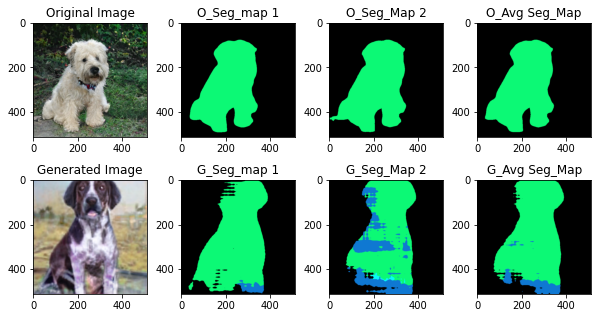

----------------------------------------------------------------------------------------------------
Epoch :  17
BCELoss  :  0.379123330116272
Loss_21_classes  :  0.3496664762496948


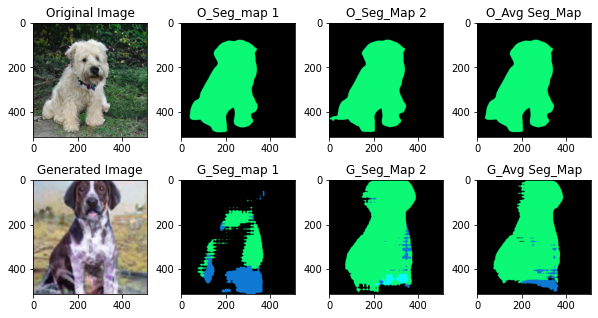

----------------------------------------------------------------------------------------------------
Epoch :  18
BCELoss  :  0.360853374004364
Loss_21_classes  :  0.4289683997631073


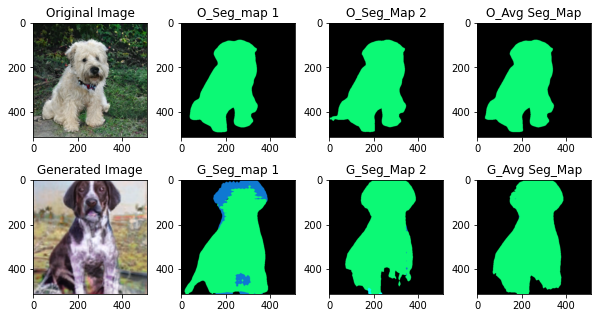

----------------------------------------------------------------------------------------------------
Epoch :  19
BCELoss  :  0.4534178674221039
Loss_21_classes  :  0.5345995426177979


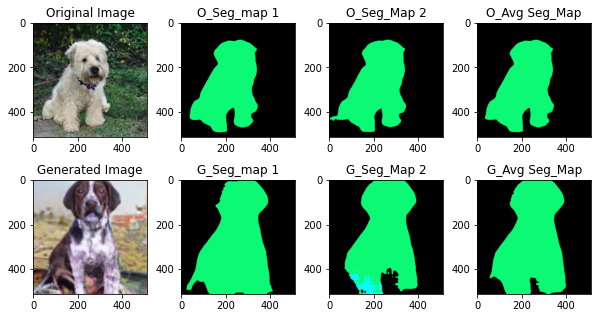

----------------------------------------------------------------------------------------------------
Epoch :  20
BCELoss  :  0.43427014350891113
Loss_21_classes  :  0.5459831357002258


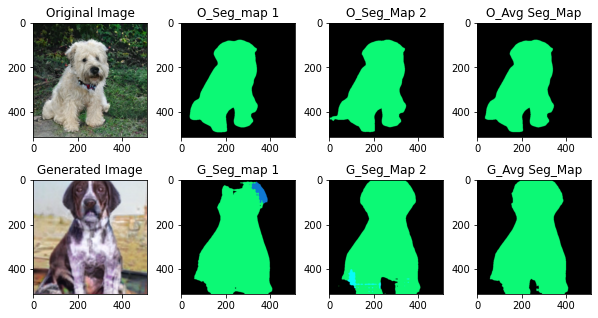

----------------------------------------------------------------------------------------------------
End


In [49]:

biggan.eval()
# optimizer = torch.optim.AdamW([z], lr=0.1)
optimizer = torch.optim.Adam([z], lr=1e-1, betas=(0.5, 0.999))

# create a color pallette, selecting a color for each class
palette = torch.tensor([2 ** 25 - 1, 2 ** 15 - 1, 2 ** 21 - 1])
colors = torch.as_tensor([i for i in range(21)])[:, None] * palette
colors = (colors % 255).numpy().astype("uint8")

for i in range(20):
    with torch.enable_grad():
        optimizer.zero_grad()
        img = biggan(z, c, truncation.item())
        output_predicted_image_1 = model(0.5 * (img.cuda() + 1))['out'][0]
        output_predicted_image_2 = model2(0.5 * (img.cuda() + 1))['out'][0]
        output_p = (output_predicted_image_1 + output_predicted_image_2)/2
        output_original_image_1 = model(input_batch)['out'][0]
        output_original_image_2 = model2(input_batch)['out'][0]
        output_o = (output_original_image_1 + output_original_image_2)/2
    #     output_predicted_image = output.argmax(0).float()
        loss = torch.nn.CrossEntropyLoss()
        loss2 = torch.nn.BCELoss()
        pred = output_p.exp()/output_p.exp().sum(axis=0) # Softmax => 21 x 512 x512
        target = output_o[[0,12]].argmax(0).unsqueeze(0).float()  # Target segmentation Map => 1 x 512 x 512
        cost = loss2(pred[[12]],target ) # Passing only dog(class 12) predictions. 
        # loss2 = torch.nn.MSELoss()
        # cost_old = torch.sqrt(loss2(output_predicted_image, output_original_image))

        # cost_1 = loss(output_predicted_image_1[[0,12]].unsqueeze(0), output_original_image_1[[0,12]].argmax(0).unsqueeze(0))
        # cost_2 = loss(output_predicted_image_2[[0,12]].unsqueeze(0), output_original_image_2[[0,12]].argmax(0).unsqueeze(0))
        cost_old = loss(output_p[[0,12]].unsqueeze(0), output_o[[0,12]].argmax(0).unsqueeze(0))
        # print("cost_old",i+1," is ", cost_old)
        print("Epoch : ",i+1)
        print("BCELoss  : ", cost.item())
        print("Loss_21_classes  : ", cost_old.item())


    fig = plt.figure(figsize=(10,5))
    plt.subplots_adjust(left = 0.125,right = 0.9,top=0.9,bottom = 0.1,wspace = 0.3,hspace = 0.2)

    ax1 = fig.add_subplot(241)
    ax1.title.set_text('Original Image')
    plt.imshow(input_image)

    ax2 = fig.add_subplot(242)
    ax2.title.set_text('O_Seg_map 1')
    r = Image.fromarray(model(input_batch)['out'][0].argmax(0).float().byte().cpu().numpy())#.resize(input_image.size)
    r.putpalette(colors)
    plt.imshow(r)
     
    ax3 = fig.add_subplot(243)
    ax3.title.set_text('O_Seg_Map 2')
    r = Image.fromarray(model2(input_batch)['out'][0].argmax(0).float().byte().cpu().numpy())#.resize(input_image.size)
    r.putpalette(colors)
    plt.imshow(r)

    ax4 = fig.add_subplot(244)
    ax4.title.set_text('O_Avg Seg_Map')
    r = Image.fromarray(output_o.argmax(0).float().byte().cpu().numpy())
    r.putpalette(colors)
    plt.imshow(r)

    ax5 = fig.add_subplot(245)
    ax5.title.set_text('Generated Image')
    pil = torchvision.transforms.ToPILImage()((0.5 * (img.data + 1)).squeeze())
    plt.imshow(pil)

    ax6 = fig.add_subplot(246)
    ax6.title.set_text('G_Seg_map 1')
    r = Image.fromarray(output_predicted_image_1.argmax(0).float().byte().cpu().numpy())
    r.putpalette(colors)
    plt.imshow(r)

    ax7 = fig.add_subplot(247)
    ax7.title.set_text('G_Seg_Map 2')
    r = Image.fromarray(output_predicted_image_2.argmax(0).float().byte().cpu().numpy())
    r.putpalette(colors)
    plt.imshow(r)

 
    ax8 = fig.add_subplot(248)
    ax8.title.set_text('G_Avg Seg_Map')
    r = Image.fromarray(output_p.argmax(0).float().byte().cpu().numpy())
    r.putpalette(colors)
    plt.imshow(r)
    plt.show()

    print('-'*100)
    cost.backward()
    optimizer.step()

print('End')